This example shows how to simulate and plot the characteristic curve of
a Zener diode.


In [ ]:


import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)




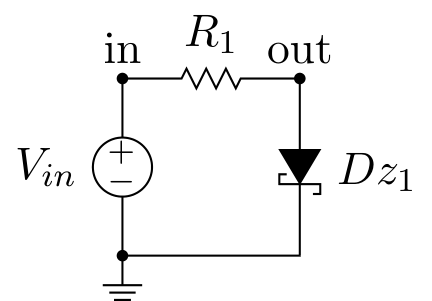

In [ ]:

circuit = Circuit('Diode DC Curve')

circuit.include(spice_library['1N4148'])
# 1N5919B: 5.6 V, 3.0 W Zener Diode Voltage Regulator
circuit.include(spice_library['d1n5919brl'])

circuit.V('input', 'in', circuit.gnd, 10@u_V)
circuit.R(1, 'in', 'out', 1@u_Ω) # not required for simulation
# circuit.X('D1', '1N4148', 'out', circuit.gnd)
circuit.X('DZ1', 'd1n5919brl', 'out', circuit.gnd)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Vinput=slice(-10, 2, .05)) # 10mV

figure, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

zener_part = analysis.out <= -5.4@u_V
# compute derivate
# fit linear part

ax1.grid()
# Fixme: scale
ax1.plot(analysis.out, -analysis.Vinput*1000)
ax1.axvline(x=0, color='black')
ax1.axvline(x=-5.6, color='red')
ax1.axvline(x=1, color='red')
ax1.legend(('Diode curve',), loc=(.1,.8))
ax1.set_xlabel('Voltage [V]')
ax1.set_ylabel('Current [mA]')

ax2.grid()
# Fixme:
# U = RI   R = U/I
dynamic_resistance = np.diff(-analysis.out) / np.diff(analysis.Vinput)
# ax2.plot(analysis.out[:-1], dynamic_resistance/1000)
ax2.semilogy(analysis.out[10:-1], dynamic_resistance[10:], basey=10)
ax2.axvline(x=0, color='black')
ax2.axvline(x=-5.6, color='red')
ax2.legend(('Dynamic Resistance',), loc=(.1,.8))
ax2.set_xlabel('Voltage [V]')
ax2.set_ylabel('Dynamic Resistance [Ohm]')

# coefficients = np.polyfit(analysis.out[zener_part], dynamic_resistance[zener_part], deg=1)
# x = np.array((min(analysis.out[zener_part]), max(analysis.out[zener_part])))
# y = coefficients[0]*x + coefficients[1]
# axe.semilogy(x, y, 'red')

plt.tight_layout()



<ipython-input-1-0c25fc394636>:36: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax2.semilogy(analysis.out[10:-1], dynamic_resistance[10:], basey=10)
